# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import helper

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/Downloads/MNIST_Fashion_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/Downloads/MNIST_Fashion_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

/Users/jha3/.conda/envs/py3_ml/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/jha3/.conda/envs/py3_ml/lib/python3.8/site-packages/torchvision/image.so, 6): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/jha3/.conda/envs/py3_ml/lib/python3.8/site-packages/torchvision/image.so
  Expected in: /Users/jha3/.conda/envs/py3_ml/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/jha3/.conda/envs/py3_ml/lib/python3.8/site-packages/torchvision/image.so
  warn(f"Failed to load image Python extension: {e}")


Here we can see one of the images.

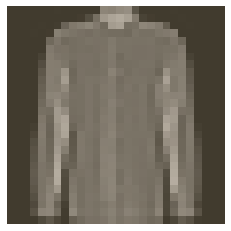

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
# Define your network architecture here
input_size = 784
hidden_sizes = [256, 128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1)) 
                      # Note that we used LogSoftmax, so we will use nn.NLLLoss as criterion

# Define the loss
criterion = nn.NLLLoss() # Use cross-entropy with softmax

# Get our data
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
log_ps = model(images)  # This is log of softmax, i.e., log of probabilities
# Calculate the loss with the logits and the labels
loss = criterion(log_ps, labels)

print(loss)

tensor(2.2968, grad_fn=<NllLossBackward0>)


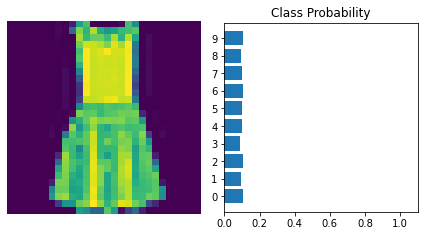

In [6]:
img_idx = 0
helper.view_classify(images[img_idx].view(1, 28, 28), torch.exp(log_ps[img_idx]))

In [7]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 1.5635e-04,  1.5635e-04,  1.5635e-04,  ...,  6.8200e-05,
          8.4830e-05,  1.5635e-04],
        [ 4.7474e-04,  4.7474e-04,  4.7474e-04,  ...,  2.5123e-04,
          4.4102e-04,  4.7474e-04],
        [-7.0206e-04, -7.0206e-04, -7.0206e-04,  ..., -7.2397e-04,
         -7.4463e-04, -7.0206e-04],
        ...,
        [ 7.7626e-04,  7.7626e-04,  7.7626e-04,  ...,  7.5413e-04,
          7.7626e-04,  7.7626e-04],
        [-6.7666e-05, -6.7666e-05, -6.7666e-05,  ..., -6.9131e-05,
         -8.9051e-05, -6.7666e-05],
        [ 1.0208e-03,  1.0208e-03,  1.0208e-03,  ...,  7.6483e-04,
          8.6837e-04,  1.0208e-03]])


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [8]:
# Create the network, define the criterion and optimizer
from torch import optim

input_size = 784
hidden_sizes = [256, 128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1)) 
                      # Note that we used LogSoftmax, so we will use nn.NLLLoss as criterion

# Define the loss
criterion = nn.NLLLoss() # Use cross-entropy with softmax

# Optimizers require the parameters to optimize and a learning rate
#optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [9]:
# Train the network here
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        
        #Training pass
        log_ps = model (images)
        # log_ps = model.forward (images)
        loss = criterion (log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")



Training loss: 0.5109737039501987
Training loss: 0.3899690372301444
Training loss: 0.35536764519237507
Training loss: 0.3287960896645782
Training loss: 0.3172145747442617


In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!
dataiter = iter(testloader)
images, labels = next(dataiter)

In [11]:
labels[0:10]

tensor([4, 0, 0, 5, 1, 9, 4, 2, 4, 6])

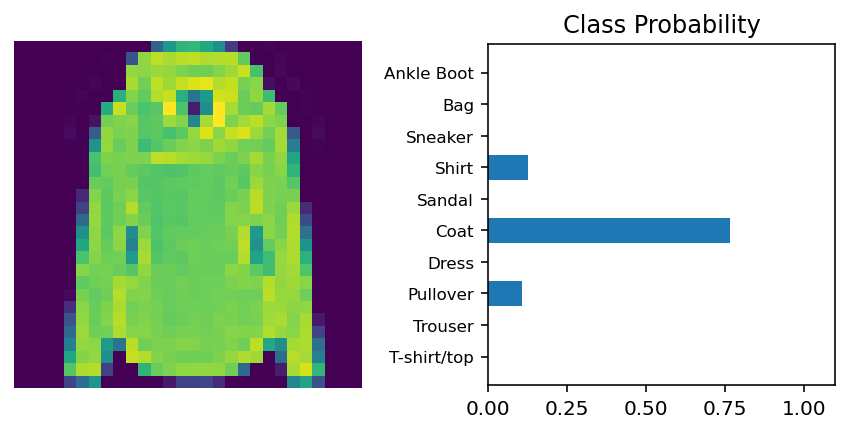

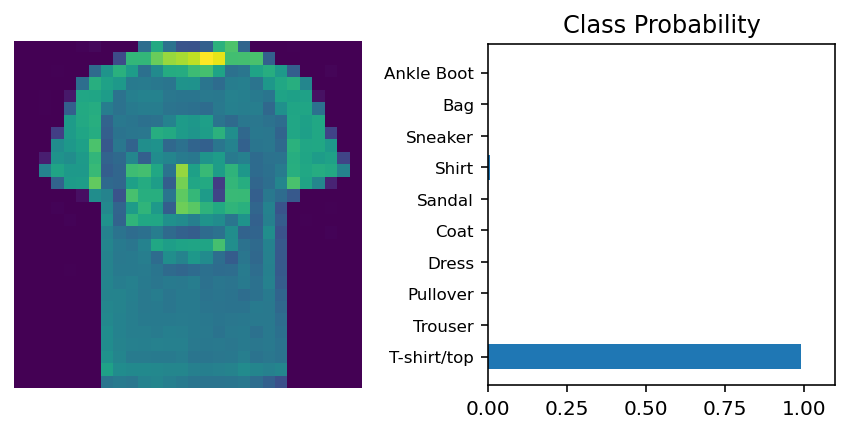

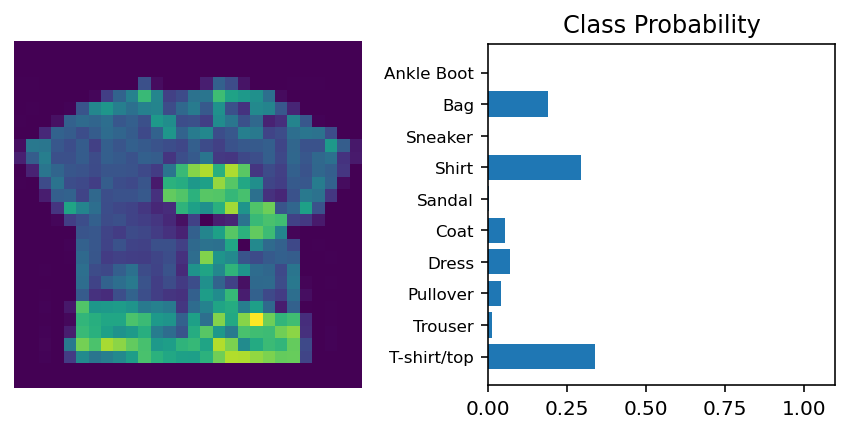

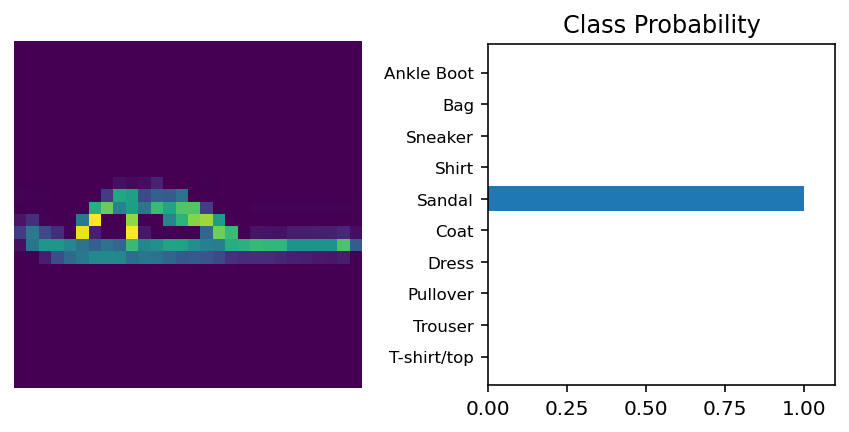

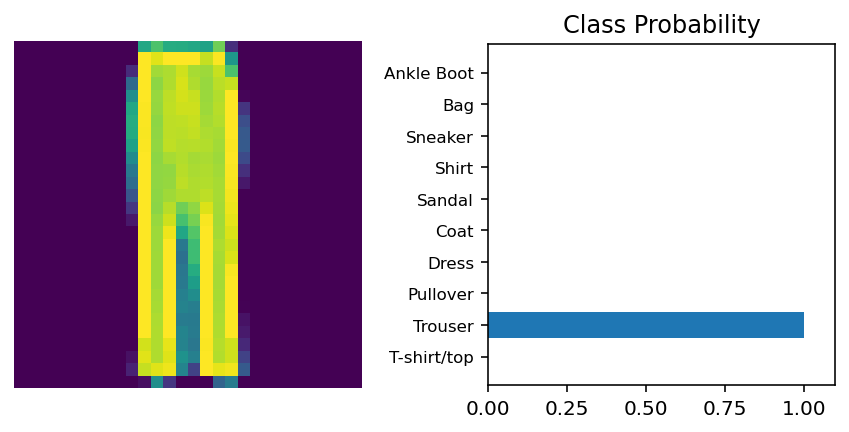

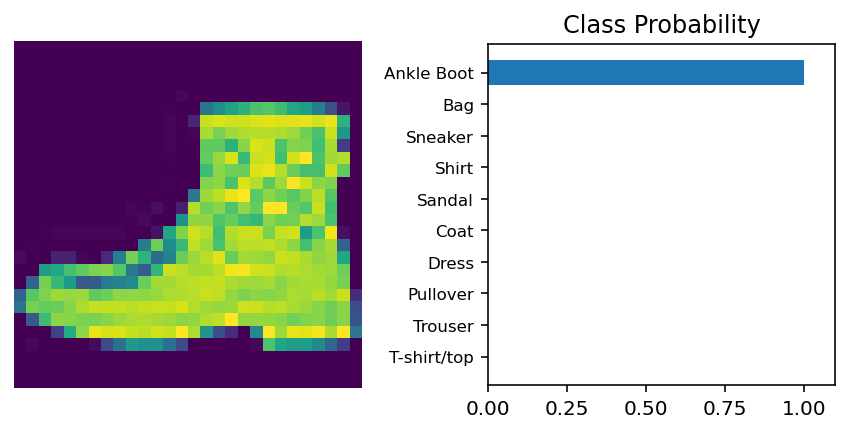

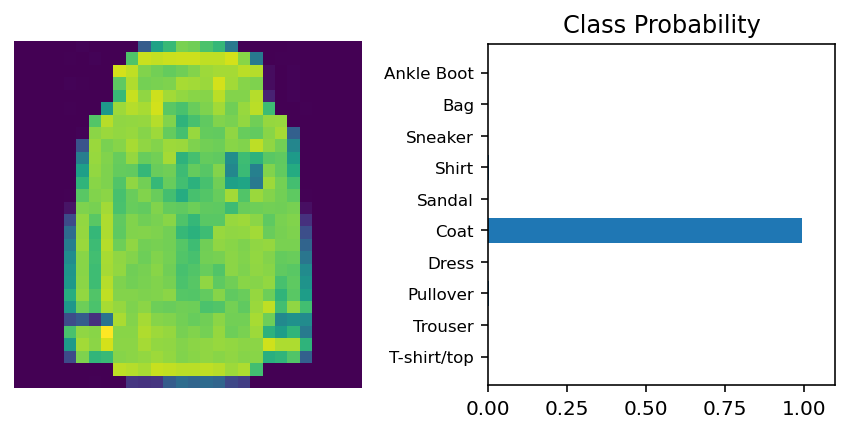

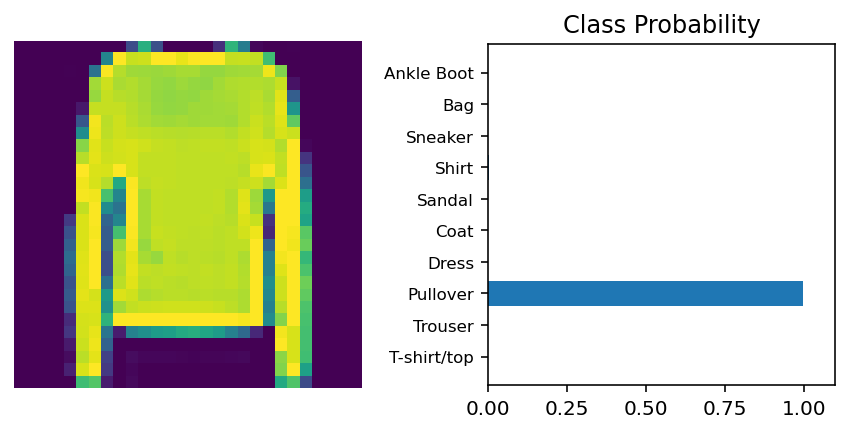

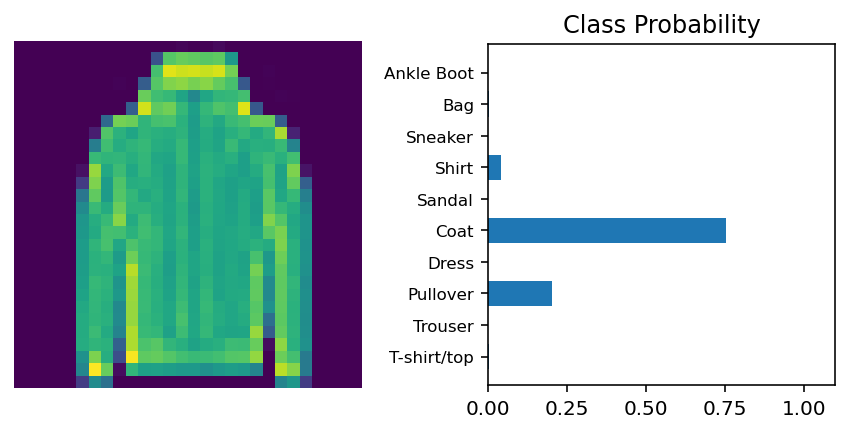

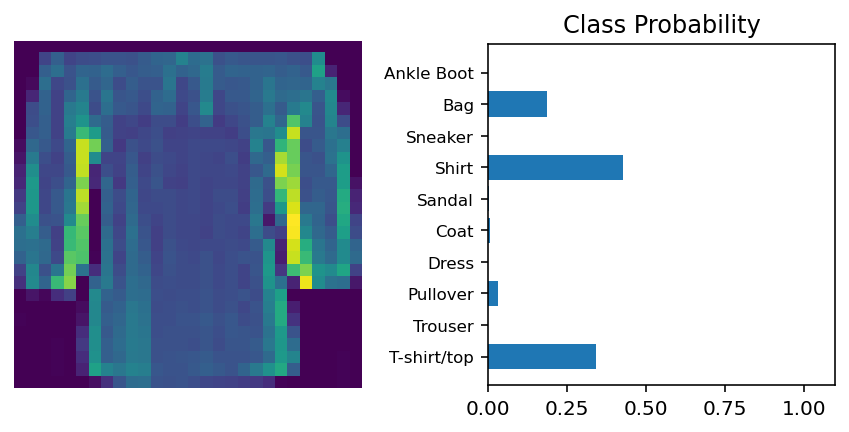

In [12]:
for img_idx in range(10):
    img = images[img_idx].view(1, 784)

    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    helper.view_classify(img.view(1, 28, 28), ps, version= 'Fashion')